 ASSIGNMENT - 3  
                              

1.Download the dataset: Dataset

2.IMAGE AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\Flowers-Dataset\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\Flowers-Dataset\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


3,4. CREATE MODEL: Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(300,activation='relu'))

In [15]:
model.add(Dense(5,activation="softmax"))

5.COMPILE THE MODEL

In [16]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [17]:
len(x_train)

180

In [18]:
len(x_test)

180

6.FIT THE MODEL

In [19]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 379s 2s/step - loss: 1.2657 - accuracy: 0.4681 - val_loss: 1.0761 - val_accuracy: 0.5798
Epoch 2/5
180/180 [==============================] - 138s 767ms/step - loss: 1.0503 - accuracy: 0.5784 - val_loss: 0.9687 - val_accuracy: 0.6115
Epoch 3/5
180/180 [==============================] - 128s 711ms/step - loss: 0.9889 - accuracy: 0.6092 - val_loss: 0.8925 - val_accuracy: 0.6461
Epoch 4/5
180/180 [==============================] - 123s 683ms/step - loss: 0.9120 - accuracy: 0.6426 - val_loss: 0.8636 - val_accuracy: 0.6720
Epoch 5/5
180/180 [==============================] - 123s 684ms/step - loss: 0.8624 - accuracy: 0.6613 - val_loss: 0.8027 - val_accuracy: 0.6933


7.SAVE THE MODEL

In [20]:
model.save("flower1.h5")

8.TEST THE MODEL

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [3]:
model=load_model("flower1.h5")

In [4]:
img=image.load_img("5794835_d15905c7c8_n.jpg",target_size=(64,64))

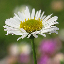

In [5]:
img

In [6]:
type(img)

PIL.Image.Image

In [7]:
x = image.img_to_array(img)

In [8]:
x

array([[[ 75.,  89.,  36.],
        [ 78.,  93.,  38.],
        [ 77.,  92.,  35.],
        ...,
        [ 94.,  95.,  53.],
        [ 93.,  91.,  52.],
        [ 80.,  91.,  48.]],

       [[ 76.,  91.,  36.],
        [ 80.,  95.,  36.],
        [ 78.,  93.,  34.],
        ...,
        [112., 105.,  63.],
        [104.,  99.,  57.],
        [ 91.,  92.,  52.]],

       [[ 79.,  94.,  39.],
        [ 82.,  97.,  38.],
        [ 81.,  97.,  34.],
        ...,
        [122., 110.,  70.],
        [114., 106.,  67.],
        [101.,  99.,  58.]],

       ...,

       [[118., 119., 105.],
        [127., 121., 109.],
        [134., 128., 116.],
        ...,
        [109., 129.,  68.],
        [110., 127.,  72.],
        [111., 123.,  73.]],

       [[133., 127., 115.],
        [133., 131., 116.],
        [142., 136., 124.],
        ...,
        [ 83., 104.,  47.],
        [ 80., 104.,  46.],
        [ 91., 103.,  55.]],

       [[142., 133., 124.],
        [144., 136., 125.],
        [144., 1

In [9]:
x.shape

(64, 64, 3)

In [10]:
x = np.expand_dims(x,axis=0)

In [11]:
x.shape

(1, 64, 64, 3)

In [12]:
pred_prob = model.predict(x)

1/1 [==============================] - 1s 595ms/step


In [13]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
class_name=["daisy","dandelio","rose","sunflower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]

In [15]:
pred_id

0

In [16]:
print("predicted animal is ",str(class_name[pred_id]))

predicted animal is  daisy
